In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('cancer.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
# Remove unnecessary cloumns from 'dataframe' df.
df.drop(['Unnamed: 32','id'],axis=1,inplace=True)

In [5]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [7]:
df.shape

(569, 31)

In [8]:
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [9]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [10]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [11]:
df.describe(include='O').T

,count,unique,top,freq
diagnosis,569,2,B,357


In [12]:
# Replaces the values "M"(Malignant) with 1 and "B"(Benignant) with 0 in the 'diagnosis' column of the DataFrame 'data1'.
# Then, it counts the occurrences of each unique value in the 'diagnosis' column.
df.replace({'M':1,'B':0},inplace=True)
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

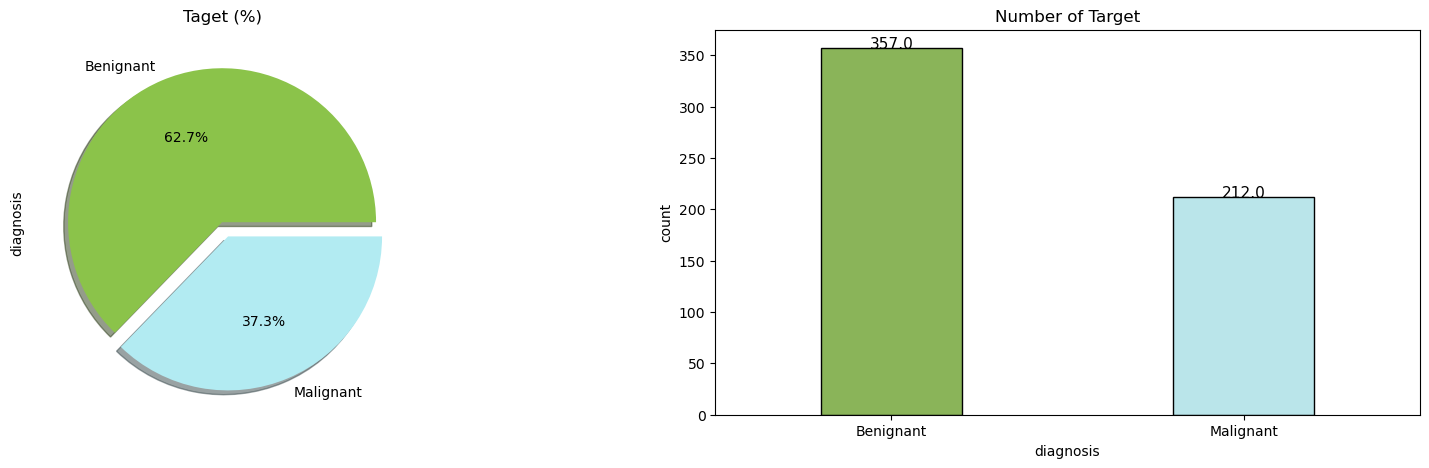

In [13]:
# Generates a pie chart showing the percentage distribution of the 'diagnosis' column values in the DataFrame 'data1'.
# Also, creates a count plot to display the number of occurrences for each 'diagnosis' value.
l=df['diagnosis'].value_counts()
colors = ['#8BC34A','#B2EBF2']
fig = plt.subplots(nrows=1,ncols=2,figsize = (20,5))
plt.subplot(1,2,1)
l.plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True, labels=['Benignant', 'Malignant'], colors=colors)
plt.title('Taget (%)')

plt.subplot(1,2,2)
ax = sns.countplot(x= 'diagnosis',data=df,palette=colors,edgecolor='black',width=0.4)
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['Benignant', 'Malignant'])
plt.title('Number of Target')
plt.show()

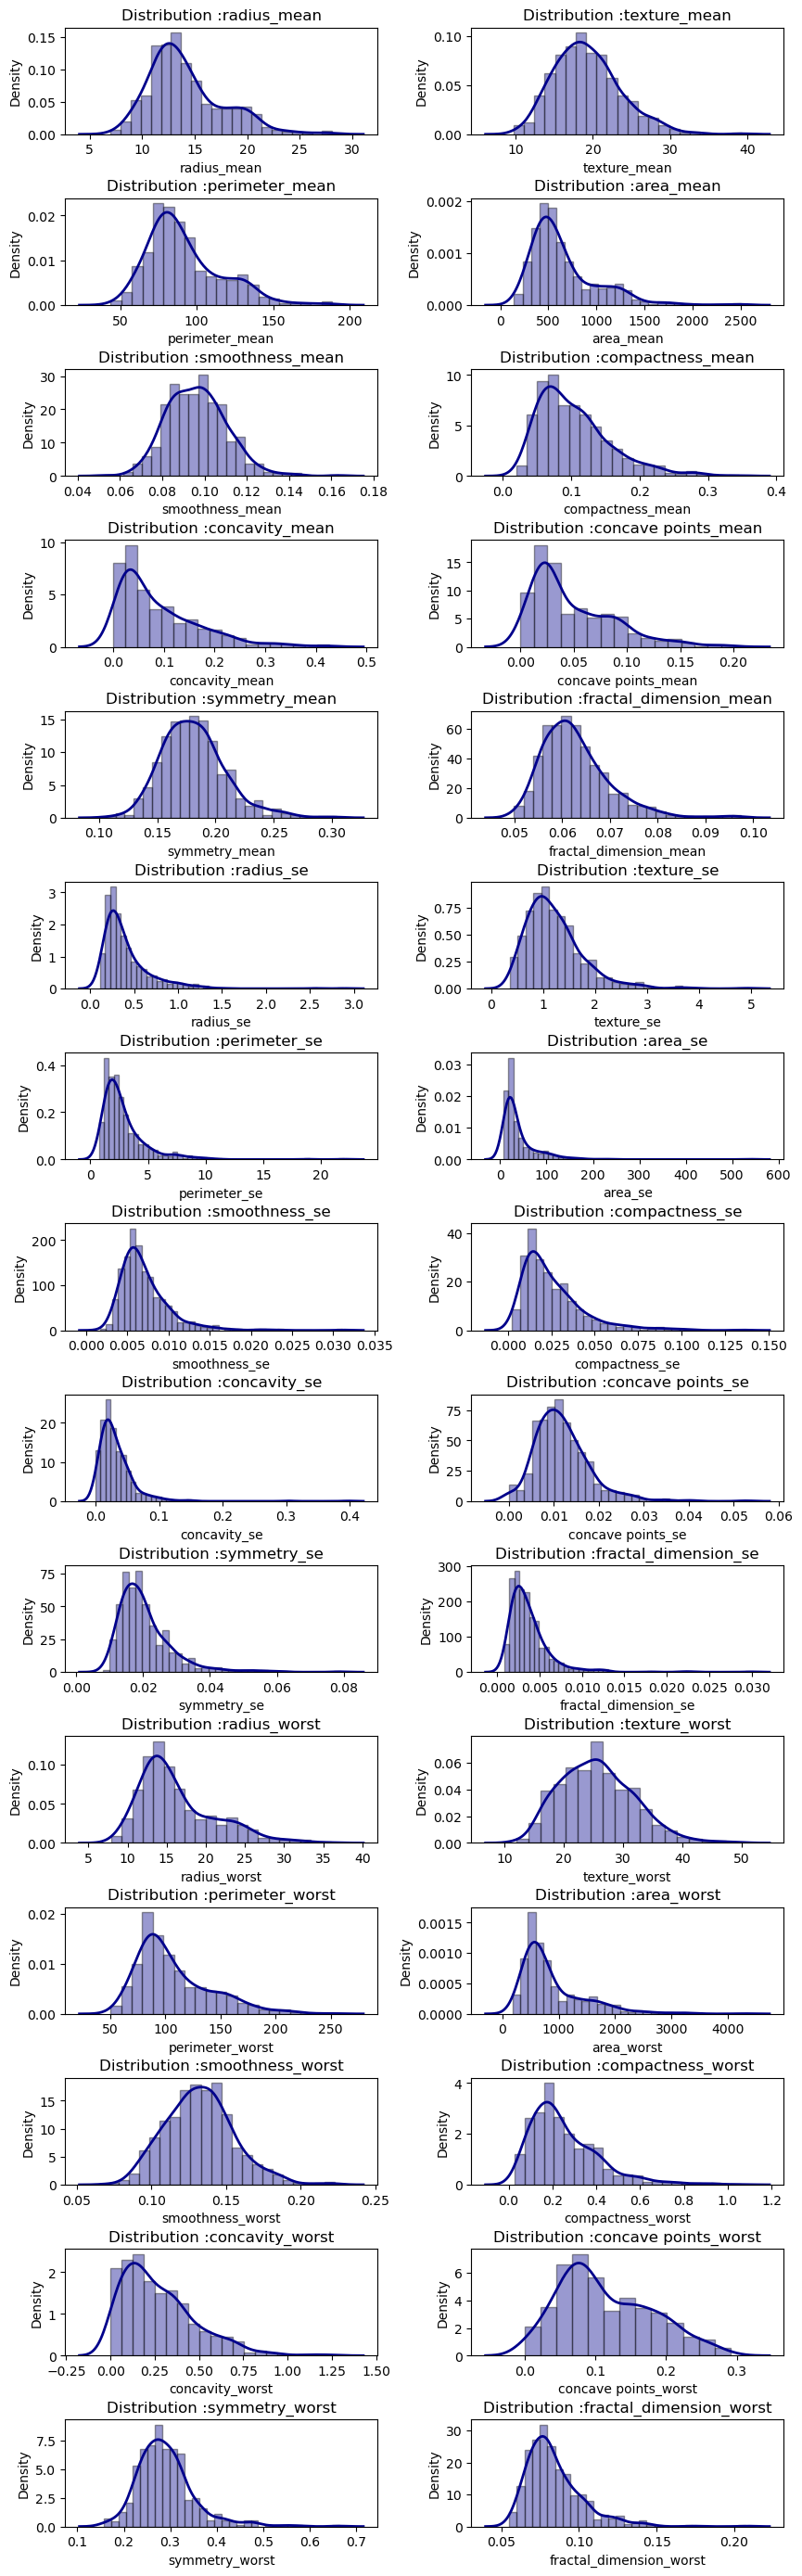

In [14]:
fig,ax=plt.subplots(nrows=15,ncols=2,figsize=(10,35))
plt.subplots_adjust(wspace=0.3,hspace=0.6)
features = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
for  i in range(len(features)):
    plt.subplot(15,2,i+1)
    sns.distplot(df[features[i]],color = 'darkblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 2})
    title = "Distribution :"+features[i]
    plt.title(title)
plt.show()

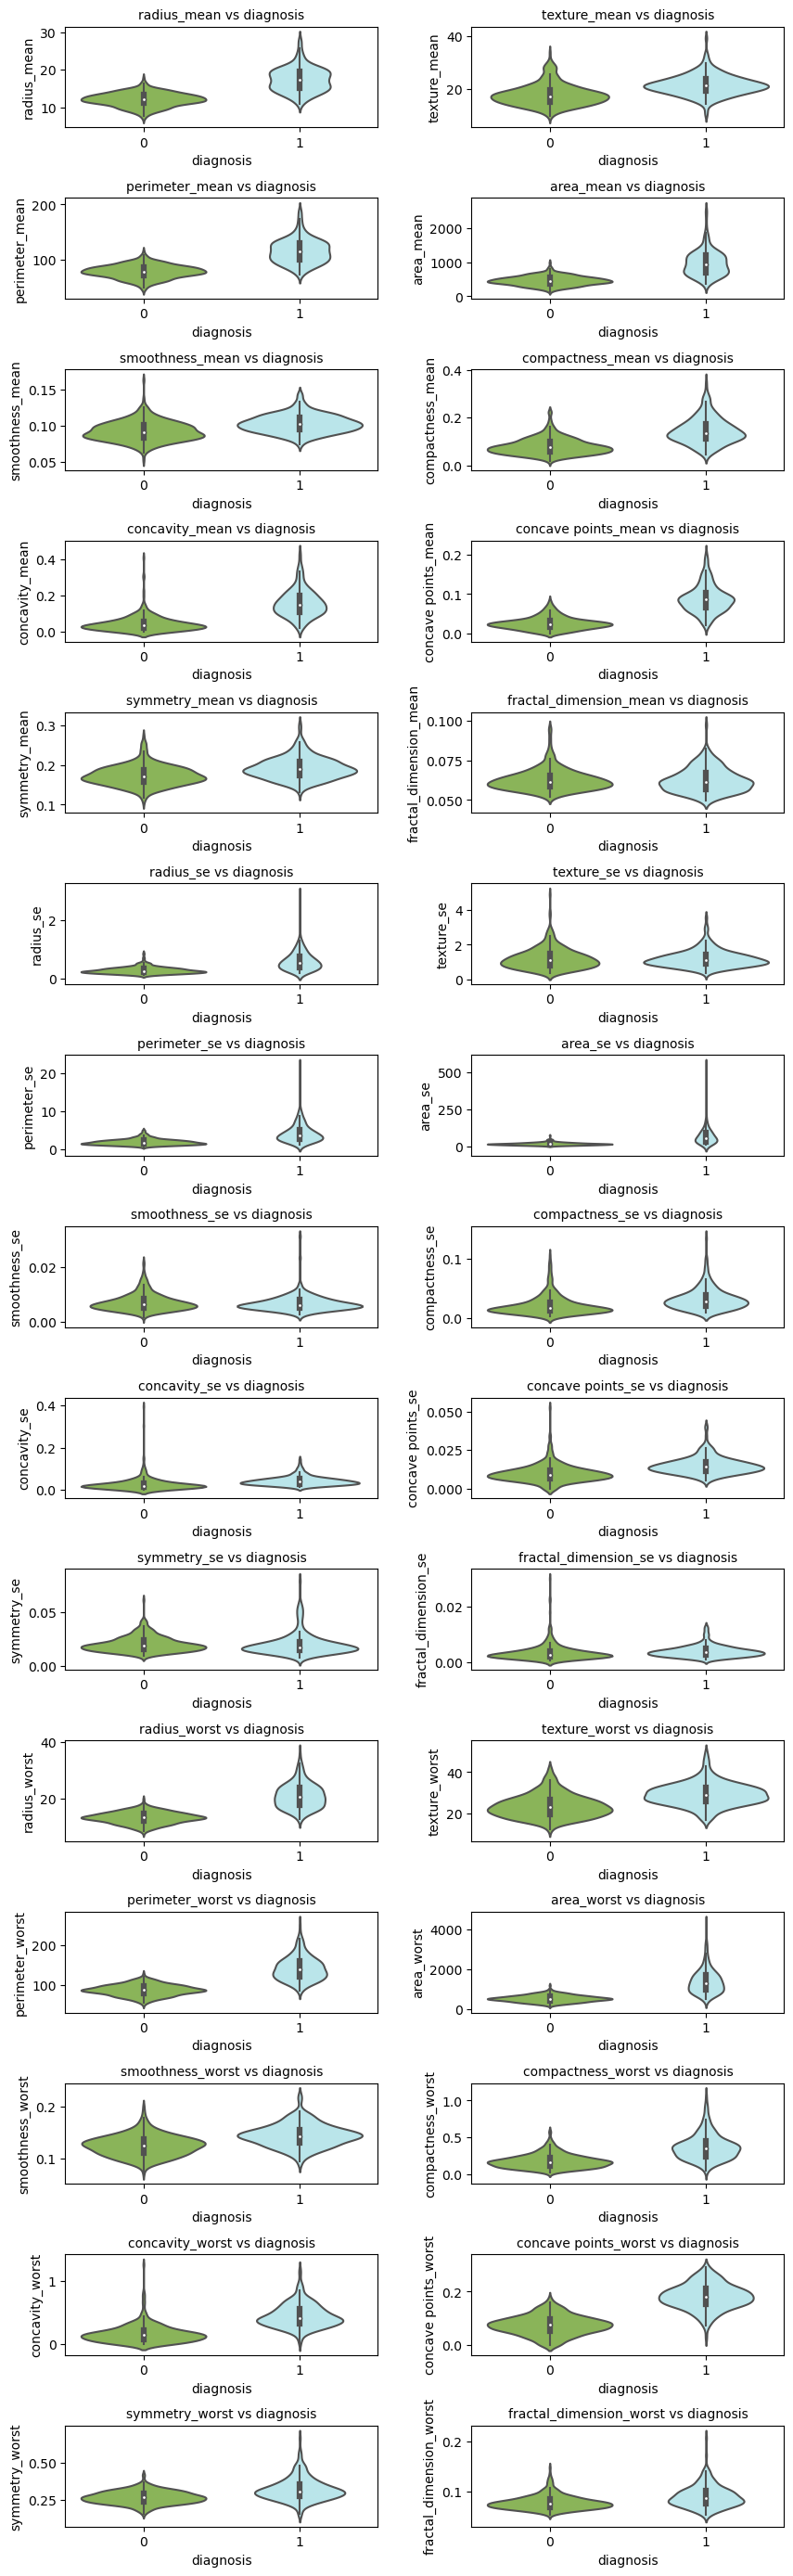

In [15]:
fig, ax = plt.subplots(nrows = 15,ncols = 2,figsize = (10,35))
plt.subplots_adjust(wspace=0.3, hspace=0.7)

for i in range(30):
    plt.subplot(15,2,i+1)
    ax = sns.violinplot(x = 'diagnosis',y = features[i],data = df,palette = colors)
    title = features[i] + ' vs diagnosis'
    plt.title(title, fontsize=10)

In [16]:
from sklearn.preprocessing import MinMaxScaler
mmn = MinMaxScaler()

In [17]:
for i in df.drop(columns=['diagnosis']).columns.to_list():
    df[i]=mmn.fit_transform(df[[i]])
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,1,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,1,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,1,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


Text(0.5, 1.0, 'Correlation w.r.t diagnosis')

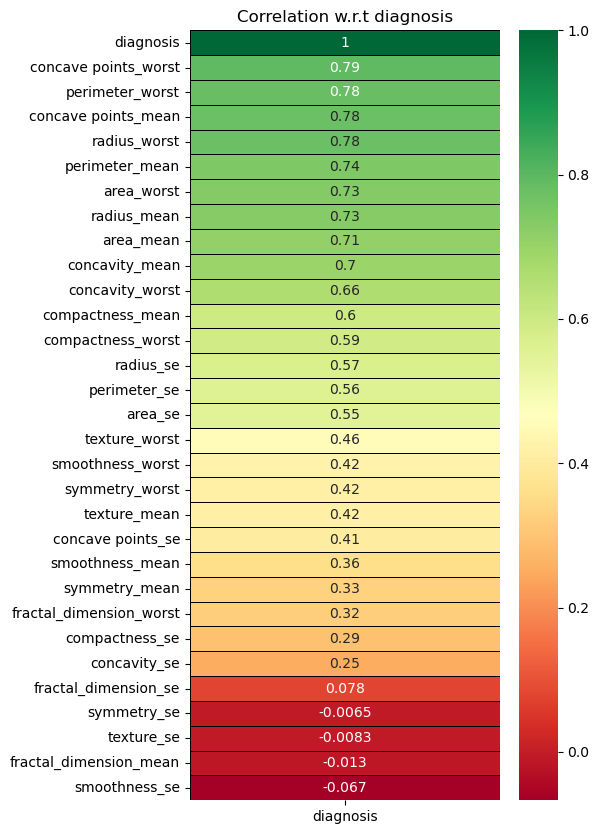

In [18]:
fig,ax=plt.subplots(figsize=(5,10))

corr = df.corrwith(df['diagnosis']).sort_values(ascending=False).to_frame()
corr.columns=['diagnosis']
sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t diagnosis')

In [19]:
df.drop(columns=['fractal_dimension_se', 'smoothness_se', 'symmetry_se', 'texture_se', 'fractal_dimension_mean'], inplace=True)

In [20]:
x = df.drop(columns='diagnosis')
y = df['diagnosis']

In [21]:
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.356147,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.156437,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.229622,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,0.139091,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.233822,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


In [22]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.20,random_state=1)

In [23]:
xtrain.shape

(455, 25)

In [24]:
xtest.shape

(114, 25)

In [26]:
logreg = LogisticRegression()
svm = SVC()
dt=DecisionTreeClassifier()
rt = RandomForestClassifier()

In [27]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    
    ac = accuracy_score(ytest,ypred)
    cs = classification_report(ytest,ypred)
    
    
    train = model.score(xtrain,ytrain)
    test = model.score(xtest,ytest)
    
    print(ac)
    print(cs)
    print(f" Training Score is {train} and Testing Score is {test}")

In [36]:
ml_model = [logreg,svm,dt,rt]
for i in ml_model:
    print("-----------------------------------------------------------------------")
    print(i)
    print(mymodel(i))

-----------------------------------------------------------------------
LogisticRegression()
0.956140350877193
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        72
           1       1.00      0.88      0.94        42

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114

 Training Score is 0.9626373626373627 and Testing Score is 0.956140350877193
None
-----------------------------------------------------------------------
SVC()
0.9736842105263158
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114

 Training Score is 0.9824175824175824 and Testing Score 

# Bagging

In [37]:
from sklearn.ensemble import BaggingClassifier
bg = BaggingClassifier(LogisticRegression())
bg.fit(xtrain,ytrain)
ypred=bg.predict(xtest)
cs = classification_report(ytest,ypred)

In [38]:
print(cs)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        72
           1       1.00      0.88      0.94        42

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



In [49]:
bg2 = BaggingClassifier(DecisionTreeClassifier())
bg2.fit(xtrain,ytrain)
ypred=bg2.predict(xtest)
cs = classification_report(ytest,ypred)
print(cs)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        72
           1       1.00      0.88      0.94        42

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



### Voting Classifier

In [40]:
from sklearn.ensemble import VotingClassifier

In [41]:
model = []
model.append(('logistic',LogisticRegression()))
model.append(('DT',DecisionTreeClassifier()))
model.append(('SVM',SVC()))
model.append(('Random',RandomForestClassifier()))

In [42]:
vt = VotingClassifier(estimators=model)
vt.fit(xtrain,ytrain)
ypred = vt.predict(xtest)

print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



### Boosting

In [43]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [44]:
adc = AdaBoostClassifier()
adc.fit(xtrain,ytrain)
ypred = adc.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96        72
           1       0.97      0.88      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [45]:
gdb = GradientBoostingClassifier()
gdb.fit(xtrain,ytrain)
ypred = gdb.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



In [46]:
from xgboost import XGBClassifier

In [47]:
xgb = XGBClassifier()
xgb.fit(xtrain,ytrain)
ypred = xgb.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        72
           1       1.00      0.88      0.94        42

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



In [48]:
train = rt.score(xtrain,ytrain)
test = rt.score(xtest,ytest)
print(f" Training score {train} and Testing Score {test}")

 Training score 1.0 and Testing Score 0.956140350877193


In [50]:
train = bg.score(xtrain,ytrain)
test = bg.score(xtest,ytest)
print(f" Training score {train} and Testing Score {test}")

 Training score 0.9956043956043956 and Testing Score 0.9473684210526315


In [51]:
train = bg2.score(xtrain,ytrain)
test = bg2.score(xtest,ytest)
print(f" Training score {train} and Testing Score {test}")

 Training score 1.0 and Testing Score 0.956140350877193


In [52]:
train = vt.score(xtrain,ytrain)
test = vt.score(xtest,ytest)
print(f" Training score {train} and Testing Score {test}")

 Training score 0.9868131868131869 and Testing Score 0.9649122807017544


In [53]:
train = adc.score(xtrain,ytrain)
test = adc.score(xtest,ytest)
print(f" Training score {train} and Testing Score {test}")

 Training score 1.0 and Testing Score 0.9473684210526315


In [54]:
train = gdb.score(xtrain,ytrain)
test = gdb.score(xtest,ytest)
print(f" Training score {train} and Testing Score {test}")

 Training score 1.0 and Testing Score 0.9649122807017544


In [55]:
train = xgb.score(xtrain,ytrain)
test = xgb.score(xtest,ytest)
print(f" Training score {train} and Testing Score {test}")

 Training score 1.0 and Testing Score 0.956140350877193
